# Customer Segmentation & Risk Profiling
Author : Daffa Damadhika Arkananta

Domain: Fintech

Methodology: K-Means Clustering & Descriptive Analytics

## Business Understanding
Dalam ekosistem Bank Digital, kecepatan dan personalisasi adalah kunci. Tantangan utamanya adalah menyeimbangkan pertumbuhan portofolio kredit (Growth) dengan kualitas aset (Risk Management).

Objective: Melakukan segmentasi nasabah berbasis perilaku (Behavioral Segmentation)

In [1]:
pip install kagglehub[pandas-datasets]

In [2]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "german_credit_data.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "uciml/german-credit",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/tmp/ipython-input-3900036505.py:8: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 48.5k/48.5k [00:00<00:00, 23.8MB/s]

First 5 records:    Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0           0   67    male    2     own             NaN           little   
1           1   22  female    2     own          little         moderate   
2           2   49    male    1     own          little              NaN   
3           3   45    male    2    free          little           little   
4           4   53    male    2    free          little           little   

   Credit amount  Duration              Purpose  
0           1169         6             radio/TV  
1           5951        48             radio/TV  
2           2096        12            education  
3           7882        42  furniture/equipment  
4           4870        24                  car  


In [5]:
print(df.info())
print(df.isnull().sum())
print("\nNUMERICAL STATS")
print(df.describe().round(2))
print("\nCATEGORICAL STATS")
print(df.describe(include='object'))
print("\nPURPOSE DISTRIBUTION")
print(df['Purpose'].value_counts())
print("\nDUPLICATES")
print("Total Duplicates:", df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.3+ KB
None
Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

NUMERICAL STATS
       Unnamed: 

## Exploratory Data Analysis

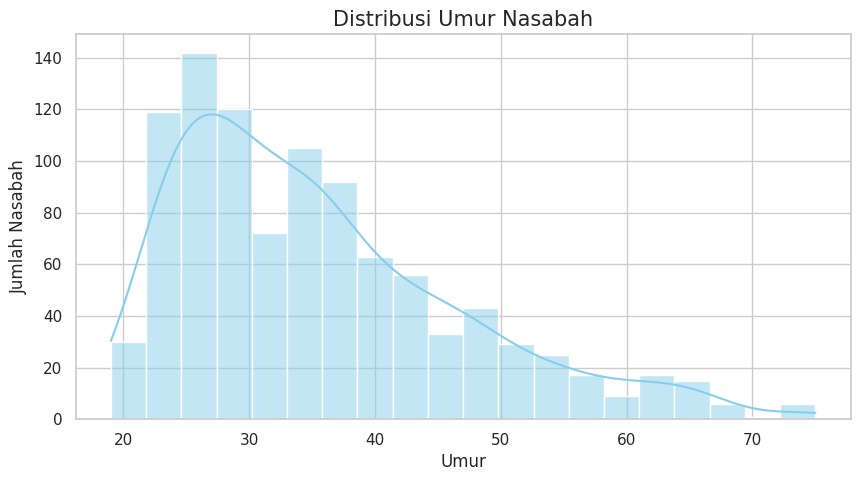

/tmp/ipython-input-2452025372.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Purpose', data=df, order=df['Purpose'].value_counts().index, palette='viridis')


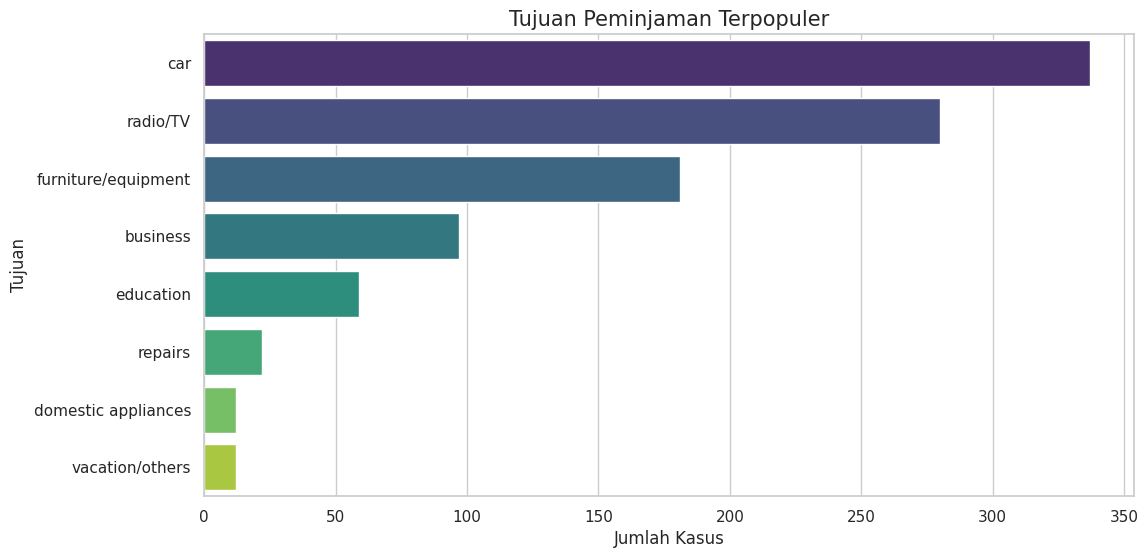

/tmp/ipython-input-2452025372.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Checking account', data=temp_df, palette='pastel',


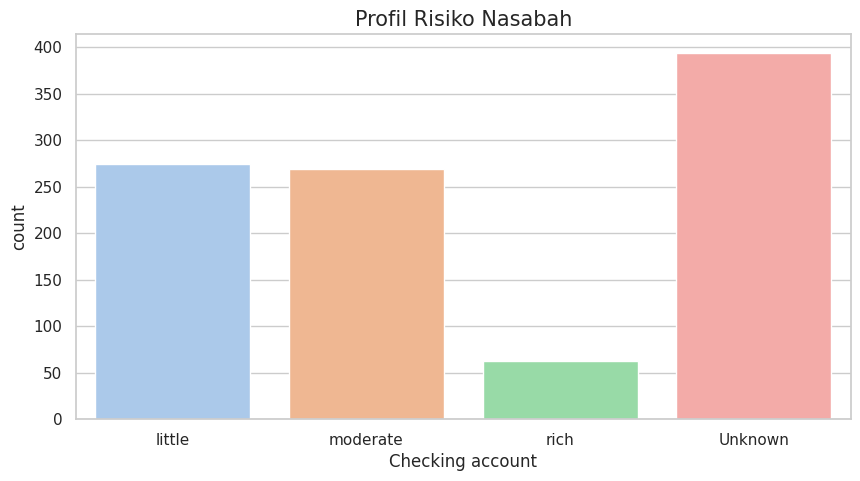

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribusi Umur Nasabah', fontsize=15)
plt.xlabel('Umur')
plt.ylabel('Jumlah Nasabah')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(y='Purpose', data=df, order=df['Purpose'].value_counts().index, palette='viridis')
plt.title('Tujuan Peminjaman Terpopuler', fontsize=15)
plt.xlabel('Jumlah Kasus')
plt.ylabel('Tujuan')
plt.show()

temp_df = df.fillna('Unknown')
plt.figure(figsize=(10, 5))
sns.countplot(x='Checking account', data=temp_df, palette='pastel',
              order=['little', 'moderate', 'rich', 'Unknown'])
plt.title('Profil Risiko Nasabah', fontsize=15)
plt.show()

Berdasarkan eksplorasi visual di atas, saya menemukan pola perilaku nasabah yang sangat relevan dengan model bisnis Bank Digital:

### Demografi
* Observasi: Distribusi umur (Histogram) menunjukkan kemiringan positif (right-skewed) dengan mayoritas nasabah berada di rentang usia 20 - 35 tahun.
* Insight Bisnis: Ini adalah "Sweet Spot" untuk Bank Digital. Segmen ini memiliki tech-literacy tinggi, terbiasa dengan aplikasi, namun seringkali belum memiliki aset besar (seperti rumah), sehingga lebih membutuhkan pinjaman konsumtif jangka pendek.

### Preferensi Produk
* Observasi: Dua tujuan peminjaman tertinggi adalah Car (Mobil) dan Radio/TV (Elektronik).
* Insight Bisnis:
    * Tingginya permintaan kredit elektronik memvalidasi potensi besar untuk fitur PayLater di dalam aplikasi.
    * Tingginya kredit mobil membuka peluang untuk produk KKB (Kredit Kendaraan Bermotor) Digital dengan persetujuan instan.

###  Profil Risiko
* Observasi:Pada grafik Checking Account, kategori terbanyak adalah `'little'` dan `'Unknown'` (NaN).
* **Insight Bisnis:** Mayoritas nasabah kita tidak memiliki saldo mengendap yang signifikan. Ini mengindikasikan bahwa kita tidak bisa mengandalkan collateral (agunan) konvensional. Penilaian kredit (Credit Scoring) harus bergeser menggunakan Behavioral Scoring (pola transaksi & pembayaran) yang akan kita bangun melalui segmentasi K-Means selanjutnya.

## Preprocessing

Akan dilakukan imputasi data pada data yang memiliki nilai NaN dan akan dilakukan standardisasi data pada age, credit amount, dan duration

In [8]:
from sklearn.preprocessing import StandardScaler

df['Saving accounts'] = df['Saving accounts'].fillna('unknown')
df['Checking account'] = df['Checking account'].fillna('unknown')

selected_features = ['Age', 'Credit amount', 'Duration']
X = df[selected_features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(X_scaled.shape)
print(X_scaled[:5])

(1000, 3)
[[ 2.76645648 -0.74513141 -1.23647786]
 [-1.19140394  0.94981679  2.24819436]
 [ 1.18331231 -0.41656241 -0.73866754]
 [ 0.8315025   1.63424694  1.75038404]
 [ 1.53512213  0.5666635   0.25695309]]


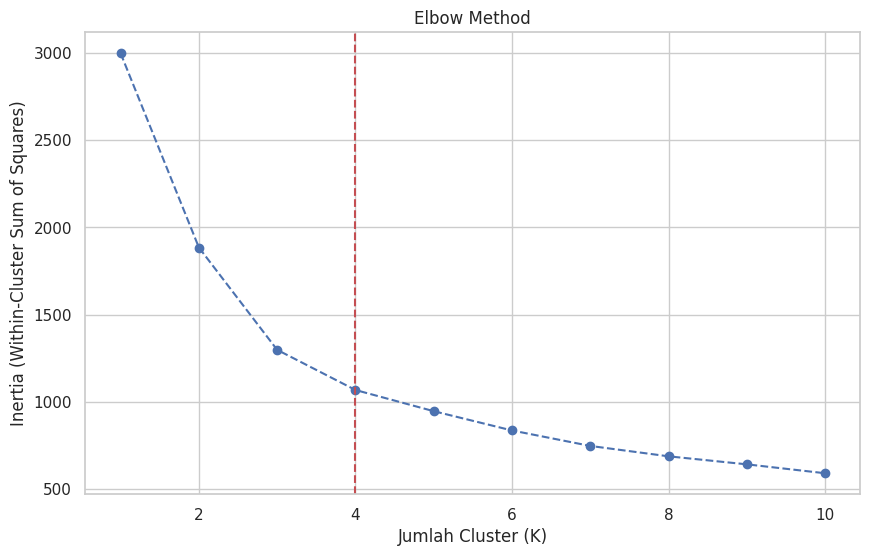

In [16]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Visualisasi Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.axvline(x=4, color='r', linestyle='--')
plt.grid(True)
plt.show()

## Modelling

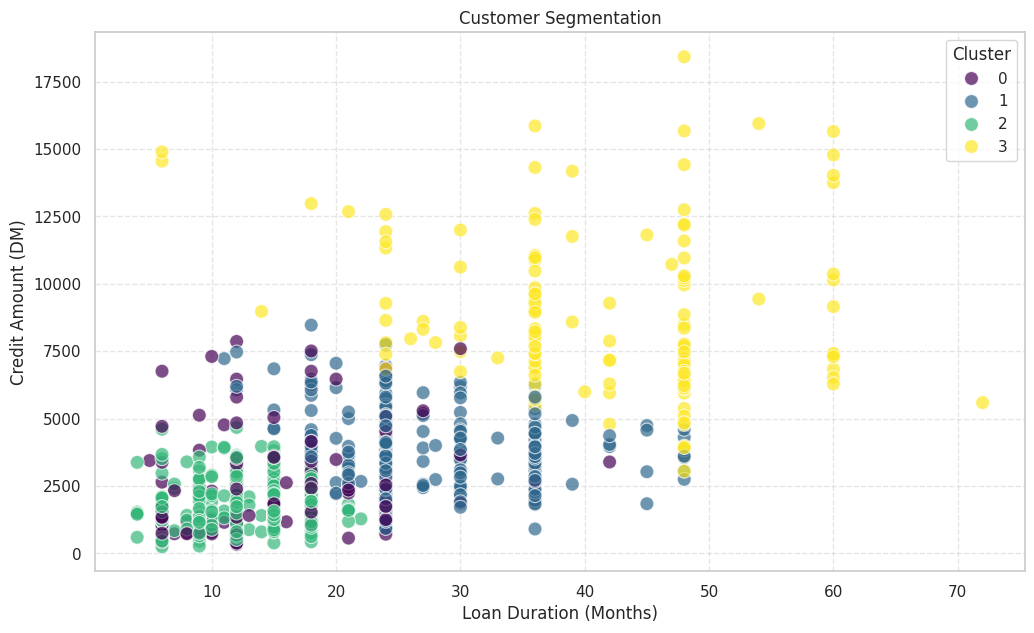

CLUSTER SUMMARY
          Age  Credit amount  Duration
Cluster                               
0        52.8         2319.0      15.8
1        30.8         3453.9      26.6
2        29.8         1677.3      12.1
3        36.8         8921.0      41.0

UMLAH NASABAH PER CLUSTER
Cluster
2    377
1    296
0    197
3    130
Name: count, dtype: int64


In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df,
    x='Duration',
    y='Credit amount',
    hue='Cluster',
    palette='viridis',
    s=100,
    alpha=0.7
)

plt.title('Customer Segmentation')
plt.xlabel('Loan Duration (Months)')
plt.ylabel('Credit Amount (DM)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Cluster')
plt.savefig('segmentation_scatter.png')
plt.show()

print("CLUSTER SUMMARY")
print(df.groupby('Cluster')[['Age', 'Credit amount', 'Duration']].mean().round(1))
print("\nUMLAH NASABAH PER CLUSTER")
print(df['Cluster'].value_counts())


Saving Account Distribution per Cluster
Saving accounts  little  moderate  quite rich  rich  unknown
Cluster                                                     
0                  0.65      0.10        0.06  0.06     0.14
1                  0.57      0.07        0.09  0.07     0.21
2                  0.58      0.14        0.07  0.04     0.17
3                  0.56      0.10        0.03  0.02     0.28

Top Purpose per Cluster
Cluster
0    radio/TV
1         car
2         car
3         car
dtype: object

Radar Chart


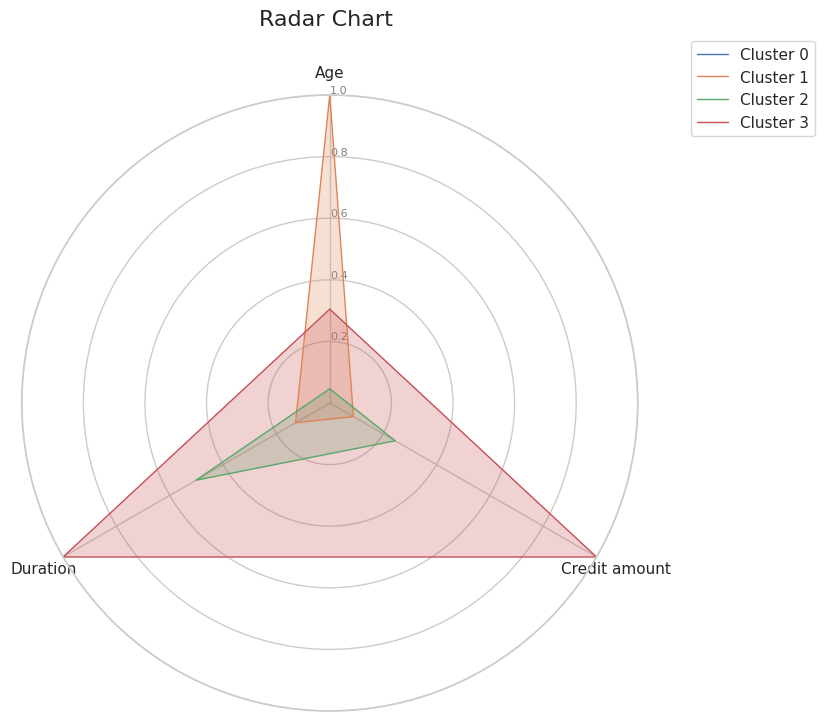

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

risk_pivot = pd.crosstab(df['Cluster'], df['Saving accounts'], normalize='index').round(2)
purpose_pivot = pd.crosstab(df['Cluster'], df['Purpose'], normalize='index').round(2)

print("\nSaving Account Distribution per Cluster")
print(risk_pivot)
print("\nTop Purpose per Cluster")
print(purpose_pivot.idxmax(axis=1))

print("\nRadar Chart")
cluster_means = df.groupby('Cluster')[['Age', 'Credit amount', 'Duration']].mean()
cluster_means_normalized = cluster_means.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

labels = ['Age', 'Credit amount', 'Duration']
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

for i, row in cluster_means_normalized.iterrows():
    values = row.values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=f'Cluster {i}')
    ax.fill(angles, values, alpha=0.25)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], labels)
ax.set_rlabel_position(0)
plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0], ["0.2", "0.4", "0.6", "0.8", "1.0"], color="grey", size=8)
ax.set_ylim(0, 1)

ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.title('Radar Chart ', size=16, y=1.1)
plt.show()

## Key Insight

* Cluster 3:

 Nasabah *High-Stakes* (peminjam jumbo) memiliki persentase `Saving accounts: unknown` tertinggi (28%). Hal ini mengkonfirmasi bahwa meskipun mereka memiliki nilai moneter tinggi, mereka adalah risiko terbesar. Strategi **Manual Underwriting** wajib diberlakukan untuk segmen ini.
* Cluster 2:

 Kluster *PayLater Users* memvalidasi status kerentanan mereka dengan 65% nasabah hanya memiliki tabungan 'little'. Meskipun pinjaman kecil, strategi *risk control* harus fokus pada *limit management* harian dan *real-time scoring* berbasis transaksi, bukan pada agunan.

* Cluster 0:

Kluster *Conservative Seniors* memiliki profil tabungan terkuat. Ini mengindikasikan mereka memiliki likuiditas. Mereka adalah target aman untuk produk pasif (deposito/investasi), alih-alih produk pinjaman agresif.

* Digital Lending Fokus:

Permintaan kredit untuk `car` mendominasi di tiga kluster (0, 1, 3). Ini menunjukkan potensi besar bagi **Kredit Kendaraan Bermotor (KKB) Digital**. Bank Digital harus berinvestasi dalam proses *approval* KKB tercepat di pasar untuk menangkap nasabah dari semua segmen usia.

* Hyper-Personalization (BNPL):

 Fokus kluster terbesar (Cluster 2) pada radio/TV mengokohkan perlunya fitur **Buy Now Pay Later (BNPL)** yang sangat terpersonalisasi. Tampilan aplikasi untuk segmen ini harus didominasi oleh promo installment dan cashback barang elektronik.


* Wealth Management:

Cluster 0 adalah satu-satunya segmen yang harus dihindari dari promo pinjaman. Strategi pemasaran di aplikasi mereka harus difokuskan pada `Wealth Management` dan edukasi investasi/pensiun.

### Kesimpulan:

Dengan menggunakan pendekatan *Hybrid* ini, Bank Digital dapat mengotomatisasi persetujuan pinjaman untuk 80% nasabah bervolume rendah/menengah (Cluster 0, 1, 2) sambil menerapkan kontrol manual yang ketat pada 13% nasabah bervalue tinggi/risiko tinggi (Cluster 3).